<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Прогнозирование оттока клиентов банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Для решения задачи нужно построить модель с предельно большим значением *F1*-score, по меньшей мере 0.59 как на валидационной, так и на тестовой выборках.

Для дополнительного контроля буду использовать метрику *AUC-ROC*, и на основании двух метрик выберу модель которая наилучшим образом будет прогнозировать ухода клиентов.

План работы:
1. Предобработать и подготовить данные к обучению.
2. Обучить несколько моделей, выбрать наиболее подходящие.
3. Замерить метрики F1, AUC-ROC, довести их до максимума перебором параметров и\или манипуляциями с обучающей выборкой.
4. Проверить лучшую модель на тестовой выборке.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head(5))
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Как обычно, в данных есть проблемы:
1. Регистр названий столбцов
2. Пропуски в столбце Tenure
3. Лишний столбец с индексами - может мешать обучению модели

In [3]:
#смена регистра
data = data.rename(columns={'RowNumber': 'row_number',
                            'CustomerId': 'customer_id',
                            'Surname': 'surname',
                            'CreditScore': 'credit_score',
                            'Geography': 'geography',
                            'Gender': 'gender',
                            'Age': 'age',
                            'Tenure': 'tenure',
                            'Balance': 'balance',
                            'NumOfProducts': 'num_of_products',
                            'HasCrCard': 'has_cr_card',
                            'IsActiveMember': 'is_active_member',
                            'EstimatedSalary': 'estimated_salary',
                            'Exited': 'exited'})

In [4]:
data['tenure'].corr(data['exited'])

-0.016761481514933764

Линейная корреляция между tenure и целевым признаком exited отсутствует, поэтому пропуски в столбце tenure можно заполнить, например нулем

In [5]:
data['tenure'] = data['tenure'].fillna(0)

In [6]:
#удаляем неинформативные столбцы, чтобы они не мешали обучению и смотрим info

data_dropped = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Подготовка данных

Для подготовки данных к обучению необходимо преобразовать категориальные признаки в количественные методом OHE.
У количественных признаков разный масштаб - их необходимо масштабировать.

In [7]:
#столбцы с id и фамилией для обучения не нужны, но при применении метода OHE превратятся
#в сотни новых столбцов. Удаляю эти столбцы из таблицы

target = data_dropped['exited']
features = data_dropped.drop('exited', axis=1)

features_ohe = pd.get_dummies(features, columns=['geography',
                                                 'gender',
                                                 'has_cr_card',
                                                 'is_active_member'],
                              drop_first=True)

#делю датафрейм на обучающую (60%), валидационную (20%) и тестовую выборки (20%)
features_train, features_vt, target_train, target_vt = train_test_split(
    features_ohe, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_vt, target_vt, test_size=0.5, random_state=12345)

#проверка размеров выборок
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


In [8]:
#масштабирую количественные признаки
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])
features_test.loc[:, numeric] = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [9]:
#проверка корректности OHE и масштабирования
display(features_train.head(5))

,credit_score,age,tenure,balance,num_of_products,estimated_salary,geography_Germany,geography_Spain,gender_Male,has_cr_card_1,is_active_member_1
7479,-0.886751,-0.373192,1.104696,1.232271,1,-0.187705,0,1,1,1,0
3411,0.608663,-0.183385,1.104696,0.600563,1,-0.333945,0,0,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,2,1.503095,1,0,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,2,-1.071061,0,0,1,1,0
3716,0.130961,-1.132419,-0.825373,1.140475,1,1.524268,1,0,0,0,0


## Исследование задачи

Попробуем обучить модели на несбалансированных признаках

### Модель решающего дерева 

In [10]:
best_tree_model = None
best_tree_accuracy = 0
best_tree_f1 = 0
best_tree_depth = 0

for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predictions_tree_valid = tree_model.predict(features_valid)
    result = f1_score(target_valid, predictions_tree_valid)
    if result > best_tree_f1:
        best_tree_model = tree_model
        best_tree_accuracy = accuracy_score(target_valid, predictions_tree_valid)
        best_tree_f1 = result
        best_tree_depth = depth

print('Глубина лучшего дерева:', best_tree_depth)
print('Accuracy лучшего дерева:', best_tree_accuracy)
print('Лучшее значение f1:', best_tree_f1)

Глубина лучшего дерева: 9
Accuracy лучшего дерева: 0.848
Лучшее значение f1: 0.5730337078651685


### Случайный лес

In [11]:
%%time
best_forest_model = None
best_forest_f1 = 0
best_forest_accuracy = 0
best_est = 0
best_depth = 0

for depth in range(1, 11):
    for est in range(10, 101, 10):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        forest_model.fit(features_train, target_train)
        predictions_forest_valid = forest_model.predict(features_valid)
        result = f1_score(target_valid, predictions_forest_valid)
        if result > best_forest_f1:
            best_forest_f1 = result
            best_forest_accuracy = accuracy_score(target_valid, predictions_forest_valid)
            best_forest_model = forest_model
            best_est = est
            best_depth = depth

print('Лучшее значение F1:', best_forest_f1)
print('Accuracy лучшей модели:', best_forest_accuracy)
print('n_estimators =', best_est)
print('depth =', best_depth)

Лучшее значение F1: 0.5893129770992367
Accuracy лучшей модели: 0.8655
n_estimators = 50
depth = 10
CPU times: user 20.5 s, sys: 93.5 ms, total: 20.6 s
Wall time: 20.6 s


F1 score: 0.5767441860465117
AUC-ROC score: 0.8511151168347255


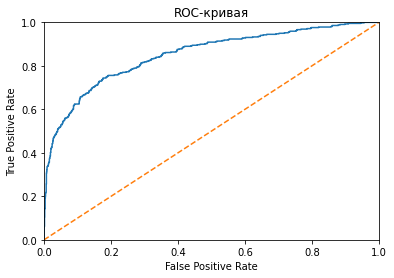

In [12]:
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('F1 score:', f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC score:', roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Модель демонстрирует относительно высокие показатели как по параметру F1 - выше 0.59, так и AUC-ROC - более 0.84. Пока непонятен результат на тестовой выборке, поэтому попробуем сделать модель еще лучше.

In [13]:
#%%time
#попробуем найти лучшую модель другим способом - модулем gridCV
#model_grid = RandomForestClassifier()

#parametrs = { 'n_estimators': range (10, 101, 10),
#              'max_depth': range (1, 11, 1),
#              'min_samples_leaf': range (1, 8),
#              'min_samples_split': range (2, 10, 2) }

#grid = GridSearchCV(model_grid, parametrs, cv=5)
#grid.fit(features_train, target_train)

#grid.best_params_

Ячейка с GridSearchCV выполнялась 46 минут, поэтому закомментирую ее и запомню здесь гиперпараметры, которые выдал алгоритм:

{'max_depth': 10,\
 'min_samples_leaf': 4,\
 'min_samples_split': 4,\
 'n_estimators': 80}

F1 score: 0.5767441860465117
AUC-ROC score: 0.8531233554521863


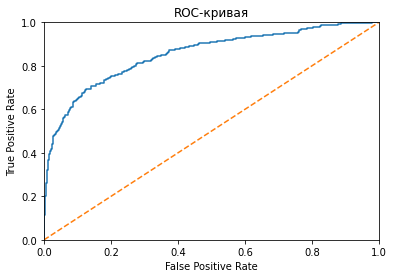

In [14]:
#Проверка метрик F1 и AUC-ROC модели gridCV

model_2 = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=10, min_samples_leaf=4, min_samples_split=4, )
model_2.fit(features_train, target_train)
predictions_valid = model_2.predict(features_valid)
print('F1 score:', f1_score(target_valid, predictions_valid))

probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC score:', roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

### Логистическая регрессия

In [15]:
lr_model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
lr_model.fit(features_train, target_train)
lr_predictions = lr_model.predict(features_valid)
lr_accuracy = accuracy_score(target_valid, lr_predictions)
lr_f1 = f1_score(target_valid, lr_predictions)
print('Accuracy:', lr_accuracy)
print('F1:', lr_f1)

Accuracy: 0.8025
F1: 0.33389544688026984


Для дальнейшего улучшения выбираем модель случайного леса, т.к. эта модель показала лучший результат на валидационной выборке.

## Борьба с дисбалансом

In [16]:
print('Всего значений в обучающей выборке:', target_train.count())
print('Значений = 1:', target_train.sum())

Всего значений в обучающей выборке: 6000
Значений = 1: 1196


1 - редкий класс в нашей выборке, что может вводить модель в заблуждение.
Размножим выборку со значением целевого признака = 1

In [17]:
def upsample(features, target, repeat):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

print(features_upsampled.shape)
print(target_upsampled.shape)
print('Всего значений в обучающей выборке:', target_upsampled.count())
print('Значений = 1:', target_upsampled.sum())

(10784, 11)
(10784,)
Всего значений в обучающей выборке: 10784
Значений = 1: 5980


Теперь в целевом признаке обучающей выборки примерно поровну нулей и единиц. Обучим 2 модели на увеличенной выборке.

F1 score: 0.5877632898696087
AUC-ROC score: 0.8398989226888621


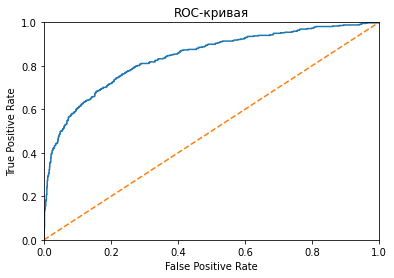

In [18]:
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
print('F1 score:', f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC score:', roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Метрики значительно улучшились

F1 score: 0.613682092555332
AUC-ROC score: 0.854372455676601


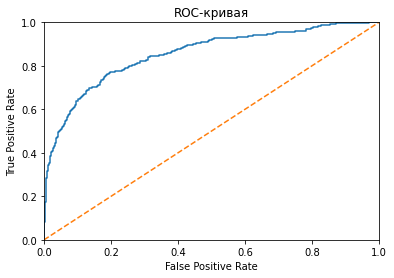

In [19]:
#Проверка параметров модели gridCV, обученной на апсемпленной выборке

model_2 = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=10, min_samples_leaf=4, min_samples_split=4, )
model_2.fit(features_upsampled, target_upsampled)
predictions_valid = model_2.predict(features_valid)
print('F1 score:', f1_score(target_valid, predictions_valid))

probabilities_valid = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC score:', roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Метрики этой модели улучшились даже сильнее, чем у первой

Попробуем другой метод борьбы с дисбалансом - балансировка веса классов, и посмотрим как изменятся метрики лучшей модели.

F1 score: 0.6342015855039638
AUC-ROC score: 0.8563746453825632


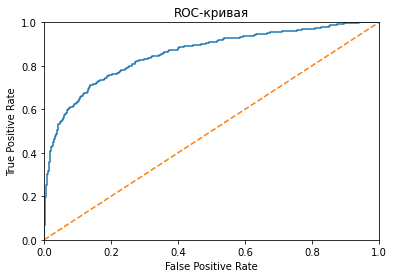

In [20]:
model_3 = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=80, max_depth=10, min_samples_leaf=4, min_samples_split=4, )
model_3.fit(features_train, target_train)
predictions_valid = model_3.predict(features_valid)
print('F1 score:', f1_score(target_valid, predictions_valid))

probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC score:', roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Балансировка классов на валидационной выборке показывает лучшие показатели, чем апсемплинг. Для полноты картины попробуем даунсемплинг.

In [27]:
def downsample(features, target, fraction):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=0.2, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=0.2, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

print(features_downsampled.shape)
print(target_downsampled.shape)
print('Всего значений в обучающей выборке:', target_downsampled.count())
print('Значений = 1:', target_downsampled.sum())

(2157, 11)
(2157,)
Всего значений в обучающей выборке: 2157
Значений = 1: 1196


F1 score: 0.5685279187817259
AUC-ROC score: 0.8468219018987532


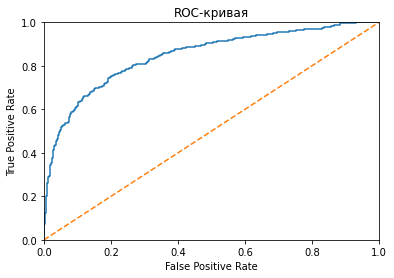

In [28]:
#обучим лучшую до этого модель на сбалансированных путем даунсемплинга данных
model = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=10, min_samples_leaf=4, min_samples_split=4, )
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
print('F1 score:', f1_score(target_valid, predictions_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print('AUC-ROC score:', roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Метрики данной модели значительно хуже, чем прудыдущих.\
Итого метрики модели GridCV с разными способами балансировки следующие:\
Апсемплинг:\
F1 - 0.613, AUC-ROC - 0.854\
Балансировка:\
<b> F1 - 0.634, AUC-ROC - 0.856</b>\
Даунсемплинг:\
F1 - 0.568, AUC-ROC - 0.846

В силу наилучших показателей выбираю балансировку для борьбы с дисбалансом классов.

## Тестирование модели

Мы имеем 2 модели случайного леса с разными гиперпараметрами, которые получены в результате перебора параметров в цикле и с помощью gridCV. Первая имеет лучшие метрики при обучении на необработанных данных, вторая модель показывает себя лучше после обучения на апсемпленных данных.

Протестируем обе модели и выберем лучшую из них.

F1 score: 0.5986078886310905
AUC-ROC score: 0.8465358260215179


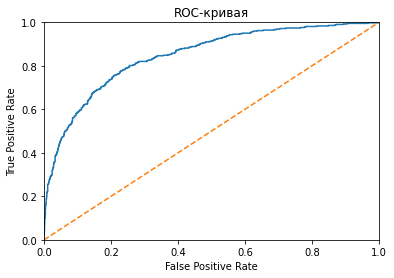

In [31]:
# тест модели, полученной перебором гиперпараметров в цикле
model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=20, max_depth=10)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print('F1 score:', f1_score(target_test, predictions_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('AUC-ROC score:', roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

F1 score: 0.6109839816933639
AUC-ROC score: 0.8598095255227703


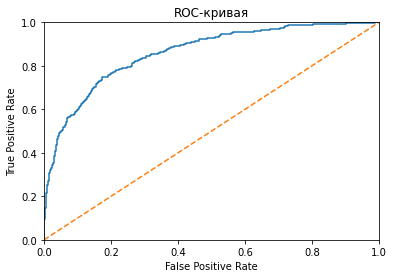

In [30]:
# тест модели, полученной модулем gridCV
model = RandomForestClassifier(random_state=12345,
                               class_weight='balanced',
                               n_estimators=80,
                               max_depth=10,
                               min_samples_leaf=4,
                               min_samples_split=4)

model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print('F1 score:', f1_score(target_test, predictions_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('AUC-ROC score:', roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [32]:
model_comparison_data = [['RandomForest_cycle', 0.576, 0.851, 0.598, 0.846],
       ['RandomForest_gridCV', 0.634, 0.856, 0.610, 0.859]]

columns = ['model', 'F1_valid', 'AUC-ROC_valid', 'F1_test', 'AUC-ROC_test']
model_comparison = pd.DataFrame(data=model_comparison_data, columns=columns)
display(model_comparison)

,model,F1_valid,AUC-ROC_valid,F1_test,AUC-ROC_test
0,RandomForest_cycle,0.576,0.851,0.598,0.846
1,RandomForest_gridCV,0.634,0.856,0.610,0.859


<AxesSubplot:xlabel='model'>

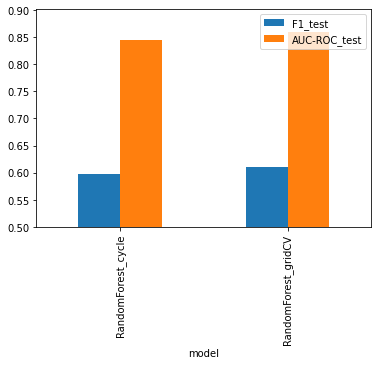

In [33]:
model_comparison.drop(['F1_valid', 'AUC-ROC_valid'], axis=1).plot(kind='bar', ylim=0.5, x='model');

Модель случайного леса, которая получилась в результате работы модуля gridCV, имеет метрики значительно лучше чем у альтернативной модели.
Для дальнейшей работы рекомендовано использовать модель RandomForestClassifier с гиперпараметрами:

`random_state=12345
class_weight='balanced'
n_estimators=80
max_depth=10
min_samples_leaf=4
min_samples_split=4`

В качестве последнего штриха объединим обучающую и валидационную выборки, после чего замерим финальные метрики F1 и AUC-ROC.

F1 score: 0.6136618141097425
AUC-ROC score: 0.8596910973494575


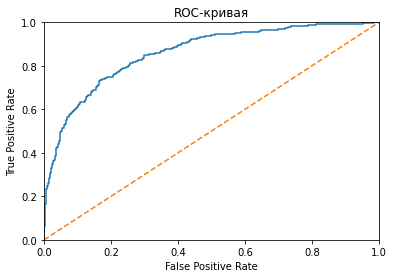

In [34]:
#сцепляем тренировочную и валидационную выборки
features_train_big = pd.concat([features_train] + [features_valid])
target_train_big = pd.concat([target_train] + [target_valid])

#перемешиваем объекты
features_train_big, target_train_big = shuffle(
        features_train_big, target_train_big, random_state=12345)

#обучаем модель, проверяем метрики на тестовой выборке
model = RandomForestClassifier(random_state=12345,
                               class_weight='balanced',
                               n_estimators=80,
                               max_depth=10,
                               min_samples_leaf=4,
                               min_samples_split=4)

model.fit(features_train_big, target_train_big)
predictions_test = model.predict(features_test)
print('F1 score:', f1_score(target_test, predictions_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print('AUC-ROC score:', roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# установка границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

## Вывод 

Наилучший результат показала модель случайного леса, полученная с помощью модуля GridCV.
На тестовой выборке модель демонстрирует высокие показатели как в метрике\
F1 score: 0.613 (выше целевого показателя 0.59)\
Так и в метрике\
AUC-ROC score: 0.859

Обучение модели было бы невозможно без прямого кодирования техникой OHE категориальных признаков и масштабирования количественных признаков. Т.к. целевой признак в исходной выборке не сбалансирован (нулей в 5 раз больше чем единиц), пришлось решать проблему дисбаланса. Лучше всего с этим справилась балансировка параметром class_weight='balanced'.

После финального выбора модели удалось еще немного увеличить значение F1-score, обучив модель на тестовой+валидационной выборках.